In [1]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

In [2]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

11490434/11490434 [==============================] - 1s 0us/step


In [3]:
print('x_train shape', x_train.shape)
print('y_train shape', y_train.shape)
print('x_test shape', x_test.shape)
print('y_test shape', y_test.shape)

x_train shape (60000, 28, 28)
y_train shape (60000,)
x_test shape (10000, 28, 28)
y_test shape (10000,)


In [53]:
img = x_test[-1, :, :]
label = y_test[-1]
print(label)

6


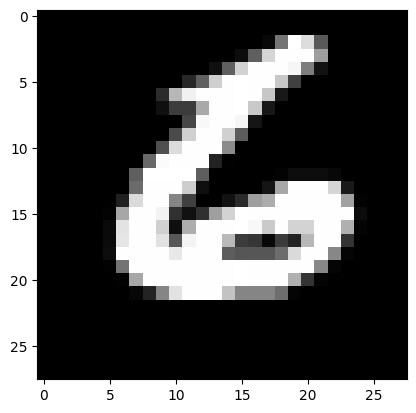

In [54]:
plt.imshow(img, cmap='gray')

In [6]:
x_train.shape

(60000, 28, 28)

In [7]:
x_train.shape[0]

60000

In [8]:
#normalization: original input range: 0-255 / new input range: 0-1
x_train_norm = x_train.astype('float32')/255
x_test_norm = x_test.astype('float32')/255

In [9]:
y_train[0]

5

#one-hot encoding
0 --> [1,0,0,0,0,0,0,0,0,0]
1 --> [0,1,0,0,0,0,0,0,0,0]
2 --> [0,0,1,0,0,0,0,0,0,0]
.
.
.
9 --> [0,0,0,0,0,0,0,0,0,1]

In [10]:
y_train_categorical = tf.keras.utils.to_categorical(y_train, num_classes=10)
y_test_categorical = tf.keras.utils.to_categorical(y_test, num_classes=10)

In [11]:
print('x_train reshaped', x_train_norm.shape)
print('y_train reshaped', y_train_categorical.shape)
print('x_test shape', x_test_norm.shape)
print('y_test shape', y_test_categorical.shape)

x_train reshaped (60000, 28, 28)
y_train reshaped (60000, 10)
x_test shape (10000, 28, 28)
y_test shape (10000, 10)


# build the CNN

In [20]:
my_model = tf.keras.Sequential()
my_model.add(tf.keras.layers.Conv2D(filters=8, kernel_size=(3,3), padding='same', activation='relu', input_shape=(28,28,1)))
my_model.add(tf.keras.layers.MaxPooling2D(pool_size=(2,2)))
my_model.add(tf.keras.layers.Conv2D(filters=16, kernel_size=(3,3), padding='same', activation='relu'))
my_model.add(tf.keras.layers.MaxPooling2D(pool_size=(2,2)))
my_model.add(tf.keras.layers.Flatten())
my_model.add(tf.keras.layers.Dense(units=10, activation='softmax')) #output layer

In [21]:
my_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 28, 28, 8)         80        
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 14, 14, 8)         0         
 g2D)                                                            
                                                                 
 conv2d_3 (Conv2D)           (None, 14, 14, 16)        1168      
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 7, 7, 16)          0         
 g2D)                                                            
                                                                 
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense_1 (Dense)             (None, 10)               

In [22]:
my_model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
                 loss="categorical_crossentropy",
                 metrics=['accuracy'])

In [23]:
earlystop = tf.keras.callbacks.EarlyStopping(monitor="val_loss", patience=5, mode="auto")

In [24]:
model_checkpoint = tf.keras.callbacks.ModelCheckpoint(
    './logs/best_model.keras',
    monitor='val_loss',
    save_best_only=True,
)

In [25]:
# fit without augmentations
history = my_model.fit(x=x_train_norm,
                        y=y_train_categorical,
                        batch_size=1,
                        epochs=50,
                        verbose=1,
                       validation_split = 0.2,
                       callbacks = [earlystop, model_checkpoint])

Epoch 1/50
3000/3000 [==============================] - 14s 4ms/step - loss: 0.2317 - accuracy: 0.9310 - val_loss: 0.1027 - val_accuracy: 0.9703
Epoch 2/50
3000/3000 [==============================] - 14s 5ms/step - loss: 0.0885 - accuracy: 0.9728 - val_loss: 0.0759 - val_accuracy: 0.9768
Epoch 3/50
3000/3000 [==============================] - 13s 4ms/step - loss: 0.0652 - accuracy: 0.9800 - val_loss: 0.0665 - val_accuracy: 0.9787
Epoch 4/50
3000/3000 [==============================] - 13s 4ms/step - loss: 0.0522 - accuracy: 0.9832 - val_loss: 0.0624 - val_accuracy: 0.9811
Epoch 5/50
3000/3000 [==============================] - 14s 5ms/step - loss: 0.0433 - accuracy: 0.9862 - val_loss: 0.0580 - val_accuracy: 0.9825
Epoch 6/50
3000/3000 [==============================] - 12s 4ms/step - loss: 0.0371 - accuracy: 0.9876 - val_loss: 0.0636 - val_accuracy: 0.9814
Epoch 7/50
3000/3000 [==============================] - 12s 4ms/step - loss: 0.0321 - accuracy: 0.9897 - val_loss: 0.0549 - val_ac

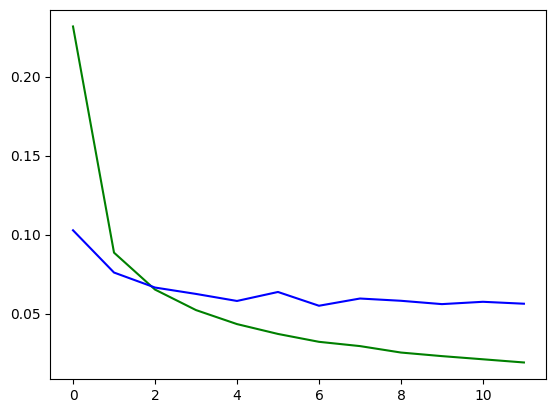

In [26]:
plt.plot(history.history['loss'], color='g')
plt.plot(history.history['val_loss'], color='b')

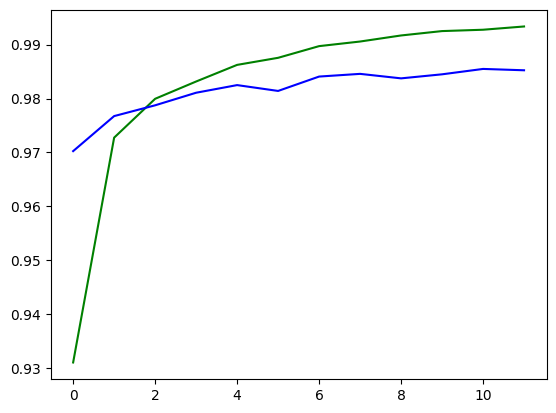

In [27]:
plt.plot(history.history['accuracy'], color='g')
plt.plot(history.history['val_accuracy'], color='b')

In [28]:
best_model = tf.keras.models.load_model('/content/logs/best_model.keras')

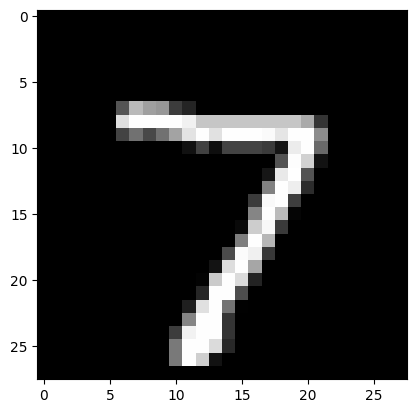

In [30]:
plt.imshow(x_test_norm[0], cmap='gray')

In [32]:
x_test_norm[0].shape

(28, 28)

In [ ]:
#(1, 28, 28, 1)

In [43]:
pred_img = np.expand_dims(x_test_norm[0], axis=-1)

In [44]:
pred_img.shape

(28, 28, 1)

In [35]:
pred_img = np.expand_dims(pred_img, axis=0)

In [36]:
pred_img.shape

(1, 28, 28, 1)

In [38]:
pred = best_model.predict(pred_img)

1/1 [==============================] - 0s 86ms/step


In [40]:
print(pred[0])

[2.8829424e-13 3.9380588e-09 1.5307251e-09 3.2271944e-07 1.5968876e-12
 5.1089709e-11 6.1150264e-21 9.9999928e-01 5.5969579e-10 3.4519053e-07]


In [41]:
print(np.argmax(pred[0]))

7


In [42]:
y_test[0]

7

In [45]:
y_test_pred = []
for i in range(len(x_test_norm)):
    img = x_test_norm[i]
    img = np.expand_dims(img, axis=-1)
    img = np.expand_dims(img, axis=0)
    #img.shape = (1,28,28,1)
    pred = best_model.predict(img)
    y_test_pred.append(np.argmax(pred[0]))

Streaming output truncated to the last 5000 lines.
1/1 [==============================] - 0s 46ms/step


In [46]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

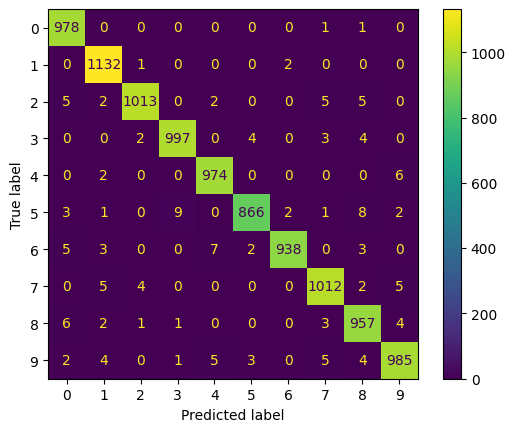

In [47]:
cm = confusion_matrix(y_test, y_test_pred, labels=[0,1,2,3,4,5,6,7,8,9])
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0,1,2,3,4,5,6,7,8,9])
disp.plot()

In [48]:
from sklearn.metrics import accuracy_score

In [51]:
print(accuracy_score(y_test, y_test_pred)*100)

98.52
